In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import pandas as pd
import wandb

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [29]:
import wandb
api = wandb.Api()
run_ids = [
    "1wpb02dh",
    "mqb2j0y3",
    "2mbi1968",
    "2o7r4f32",
    "2zghy7cs",
    "24ju3o5b",
    "3bu1wts2",
    # wide resnets
    "200dfvfl",
    "z43wsdbk",
    "21ymka9z",
    "20tipo0l",
    "36u2ugju",
    "3ach3s6f",
    "36sa93oj",
    "ashld1px",
    "r59jeqa6",
    "1idniv9f",
]
df_dict = {
    "run_id":[],
    "State":[],
    "model":[],
    "rigl.const_fan_in":[],
    "rigl.dense_allocation":[],
    "training.seed":[],
    "accuracy":[]
}
entity, project = "condensed-sparsity", "condensed-rigl"
for id in run_ids:
    run = api.run(f"{entity}/{project}/{id}")
    summary = run.summary
    config = run.config
    df_dict["run_id"].append(id)
    df_dict["State"].append(run.state)
    df_dict["model"].append(config["model"]["name"])
    df_dict["rigl.const_fan_in"].append(config["rigl"]["const_fan_in"])
    df_dict["rigl.dense_allocation"].append(config["rigl"]["dense_allocation"])
    df_dict["training.seed"].append(config["training"]["seed"])
    df_dict["accuracy"].append(summary["accuracy"])
additional_runs = pd.DataFrame(df_dict)

In [30]:
additional_runs

,run_id,State,model,rigl.const_fan_in,rigl.dense_allocation,training.seed,accuracy
0,1wpb02dh,finished,resnet18,True,0.30,6037,0.9530
1,mqb2j0y3,finished,resnet18,True,0.20,7303,0.9537
2,2mbi1968,finished,resnet18,True,0.30,8746,0.9540
3,2o7r4f32,finished,resnet18,True,0.01,6037,0.9147
4,2zghy7cs,finished,resnet18,True,0.01,8746,0.9083
5,24ju3o5b,finished,resnet18,True,0.20,42,0.9491
6,3bu1wts2,finished,resnet18,True,0.20,2078,0.9531
7,200dfvfl,finished,wide_resnet22,False,0.10,8746,0.9305
8,z43wsdbk,finished,wide_resnet22,True,0.01,42,0.7985
9,21ymka9z,finished,wide_resnet22,False,0.10,6037,0.9348


In [31]:
_INDEPENDENT_VARS = [
    "rigl.dense_allocation",
    "rigl.const_fan_in",
    "model",
]

In [32]:
df = pd.read_csv("/home/condensed-sparsity/data/results/wandb_export_2022-06-08T15_49_19.313-06_00.csv")
plt.style.use("../plt_plot_style.mplstyle")

In [33]:
df.loc[df["State"] != "finished"][["Name", "State", "rigl.dense_allocation", "training.seed", "rigl.const_fan_in"]]

,Name,State,rigl.dense_allocation,training.seed,rigl.const_fan_in
0,autumn-sweep-144,crashed,NaN,42,False
1,chocolate-sweep-143,crashed,NaN,2078,False
2,lemon-sweep-142,crashed,NaN,7303,False
3,genial-sweep-141,crashed,NaN,6037,False
4,dutiful-sweep-140,crashed,NaN,8746,False
25,wide_resnet22_cifar10_sweep_0.1_False,crashed,0.10,42,False
26,wide_resnet22_cifar10_sweep_0.1_False,crashed,0.10,2078,False
27,wide_resnet22_cifar10_sweep_0.1_False,failed,0.10,7303,False
28,wide_resnet22_cifar10_sweep_0.1_False,crashed,0.10,6037,False
29,wide_resnet22_cifar10_sweep_0.1_False,crashed,0.10,8746,False


In [34]:
df = pd.concat([df, additional_runs])
df = df.loc[df["State"].isin(["finished", "running"])]


In [35]:
df.groupby(["rigl.const_fan_in", "rigl.dense_allocation", "model"]).count()

Name  Agent  State  \
rigl.const_fan_in rigl.dense_allocation model                               
False             0.01                  resnet18          5      5      5   
                                        wide_resnet22     4      4      5   
                  0.05                  resnet18          5      5      5   
                                        wide_resnet22     5      5      5   
                  0.10                  resnet18          5      5      5   
                                        wide_resnet22     0      0      5   
                  0.20                  resnet18          5      5      5   
                                        wide_resnet22     5      5      5   
                  0.30                  resnet18          5      5      5   
                                        wide_resnet22     5      5      5   
                  0.40                  resnet18          5      5      5   
                                        wide_resnet22     5      5      5   
                  0.50                  resnet18          5      5      5   
                                        wide_resnet22     5      5      5   
True              0.01                  resnet18          3      3      5   
                                        wide_resnet22     4      4      5   
                  0.05                  resnet18          5      5      5   
                                        wide_resnet22     2      2      5   
                  0.10                  resnet18          5      5      5   
                                        wide_resnet22     5      5      5   
                  0.20                  resnet18          2      2      5   
                                        wide_resnet22     5      5      5   
                  0.30                  resnet18          3      3      5   
                                        wide_resnet22     5      5      5   
                  0.40                  resnet18          5      5      5   
                                        wide_resnet22     5      5      5   
                  0.50                  resnet18          5      5      5   
                                        wide_resnet22     5      5      5   

                                                       Notes  Created  \
rigl.const_fan_in rigl.dense_allocation model                           
False             0.01                  resnet18           5        5   
                                        wide_resnet22      4        4   
                  0.05                  resnet18           5        5   
                                        wide_resnet22      5        5   
                  0.10                  resnet18           5        5   
                                        wide_resnet22      0        0   
                  0.20                  resnet18           5        5   
                                        wide_resnet22      5        5   
                  0.30                  resnet18           5        5   
                                        wide_resnet22      5        5   
                  0.40                  resnet18           5        5   
                                        wide_resnet22      5        5   
                  0.50                  resnet18           5        5   
                                        wide_resnet22      5        5   
True              0.01                  resnet18           3        3   
                                        wide_resnet22      4        4   
                  0.05                  resnet18           5        5   
                                        wide_resnet22      2        2   
                  0.10                  resnet18           5        5   
                                        wide_resnet22      5        5   
                  0.20                  resnet18           2        2   
                                        wide_resnet22      5     

In [37]:
df.loc[
    (df["model"] == "wide_resnet22") &
    (df["rigl.dense_allocation"] == 0.05) &
    (df["rigl.const_fan_in"] == True)
].dropna(axis=1)

,State,model,rigl.const_fan_in,rigl.dense_allocation,training.seed,accuracy
71,finished,wide_resnet22,True,0.05,2078,0.9176
72,finished,wide_resnet22,True,0.05,7303,0.9157
10,finished,wide_resnet22,True,0.05,8746,0.9133
12,finished,wide_resnet22,True,0.05,6037,0.9143
14,finished,wide_resnet22,True,0.05,42,0.9159


In [38]:
with open("dict.csv", "w") as handle:
    handle.write(df.to_csv(index=False))

In [39]:
## Style sheet: 
style = """
# Figure properties
figure.figsize: 10, 6 # figure size in inches

# Font properties
font.size: 16 # Size of the font
font.family: sans-serif # Type of Font
font.sans-serif : "DejaVu Sans"


# Axes properties
axes.linewidth: 2  # edge linewidth
axes.labelpad: 8   # space between label and axis
axes.prop_cycle: cycler(color=['00a5bb','f79141','499585', 'd81e52', '6cb2c5' , '6c77c5', 'c5ba6c', '56ce93', 'd88fBf', 'ffd505']) # color cycle for plot lines
axes.titlepad: 20.0    # pad between axes and title in points
axes.labelsize: 16     # Axes labels size
axes.titlesize: 20     # Plot title size
axes.labelweight: 500  # Axel Labels weight
axes.titleweight: 500  # Axel Titleweight
axes.edgecolor: 262626
axes.labelcolor: 262626
axes.titlecolor: 262626

# Tick properties
# x-axis
xtick.direction: inout # direction: in, out, or inout
xtick.major.size: 0 # major tick size in points
xtick.major.width: 0 # major tick width in points
xtick.minor.size: 0 # minor tick size in points
xtick.minor.width: 0 # minor tick width in points
xtick.major.pad : 10
xtick.minor.pad: 10
xtick.labelsize : 16

# y-axis
ytick.direction: inout # direction: in, out, or inout
ytick.major.size: 0 # major tick size in points
ytick.major.width: 0 # major tick width in points
ytick.minor.size: 0 # minor tick size in points
ytick.minor.width: 0 # minor tick width in points
ytick.major.pad : 10
ytick.minor.pad: 10
ytick.labelsize : 16

# Line properties
lines.linewidth: 3.5

# Legend properties
legend.framealpha: 0.8  # opacity of legend frame
legend.frameon: False   # whether or not to draw a frame around legend
legend.fontsize: 14     # Font size of the legend
legend.borderpad : 0
#legend.borderaxespad: 1.5

#Edge Color properties
#patch.force_edgecolor: True #Edge color for the bars
"""
with open("plt_plot_style.mplstyle", "w") as handle:
  handle.write(style)

plt.style.use("./plt_plot_style.mplstyle")

In [40]:
def get_confidence_bounds_df(df: pd.DataFrame, alpha=0.95, target_col:str = "accuracy"):
    df = df.copy()
    df = df.loc[~df[target_col].isna()]
    results = {
        "sparsity":[],
        "mean":[],
        "lower_bound":[],
        "upper_bound":[],
    }
    for sparsity in df["sparsity"].unique():
        this_df = df.loc[df["sparsity"] == sparsity]
        results["sparsity"].append(sparsity)
        results["mean"].append(this_df[target_col].mean())
        lower, upper = st.t.interval(
            alpha=alpha,
            df=len(this_df[target_col])-1,
            loc=this_df[target_col].mean(),
            scale=st.sem(this_df[target_col])
        )
        results["lower_bound"].append(lower)
        results["upper_bound"].append(upper)
    return pd.DataFrame(results)

In [41]:
# df["Mean Accuracy"] = df.groupby(_INDEPENDENT_VARS).mean()["accuracy"].reset_index()
original_df = df.copy()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: "DejaVu Sans"
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: "DejaVu Sans"
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: "DejaVu Sans"


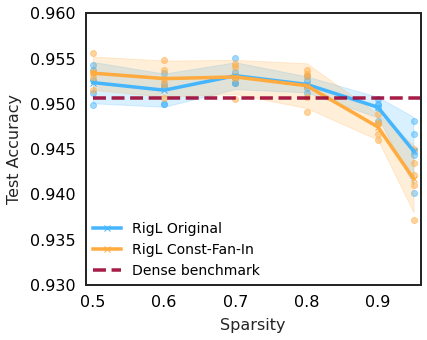

In [42]:
_MODEL = "resnet18"
_PLOT_99_SPARSITY= False

plot_df = df.copy()
plot_df = plot_df.loc[plot_df["State"] == "finished"]
if not _PLOT_99_SPARSITY:
  plot_df = plot_df.loc[plot_df["rigl.dense_allocation"] != 0.01]
plot_df = plot_df.loc[plot_df["model"] == _MODEL]
plot_df["sparsity"] = 1-plot_df["rigl.dense_allocation"]
plot_dfs = []
fig, ax = plt.subplots(figsize=(6,5))
colors = ['#45b6fe','#ffab40','#9c0534'] # '#ffab40' '#ff671f'

table_df = {
    "sparsity":[],
    "method":[],
    "lower_bound":[],
    "upper_bound":[],
    "+/-":[]
}

for idx, fan_in in enumerate(plot_df["rigl.const_fan_in"].unique()):
    df_slice = plot_df.loc[plot_df["rigl.const_fan_in"] == fan_in]
    if fan_in:
        name = "RigL Const-Fan-In"
    else:
        name = "RigL Original"
    agg_results = get_confidence_bounds_df(df_slice)
    agg_results["method"] = [name]*len(agg_results)
    agg_results["+/-"] = 100*(agg_results["mean"]-agg_results["lower_bound"])
    ax.plot(
        agg_results["sparsity"], agg_results["mean"], marker='x', label=name, color=colors[idx], alpha=1.0
    )
    ax.fill_between(
        agg_results["sparsity"],
        agg_results["upper_bound"],
        agg_results["lower_bound"],
        color=colors[idx],
        alpha=0.20)
    ax.scatter(
        df_slice["sparsity"], df_slice["accuracy"], marker='o', color=colors[idx], alpha=0.5
    )
_BENCHMARK_VALUE = 0.9506
ax.plot([0.5, 1.0], [_BENCHMARK_VALUE, _BENCHMARK_VALUE], "--",  label="Dense benchmark", color=colors[2], alpha=0.9)
model_name_dict = dict(
    resnet18="ResNet18",
    wide_resnet22="WideResNet22"
)
#plt.title(f"{model_name_dict[_MODEL]} CIFAR-10 Validation Set Accuracy vs. Sparsity")
plt.xlabel('Sparsity')
plt.ylabel('Test Accuracy')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
if not _PLOT_99_SPARSITY:
  ax.set_ylim([0.93,0.96])
  ax.set_xlim([0.49,.96])
else:
  ax.set_ylim([0.9,1.0])
  ax.set_xlim([0.49,1.0])
plt.show()

fig.savefig("resnet_cifar_results.png", dpi=600, bbox_inches="tight")
fig.savefig("Experiment.svg",format="svg", bbox_inches="tight")

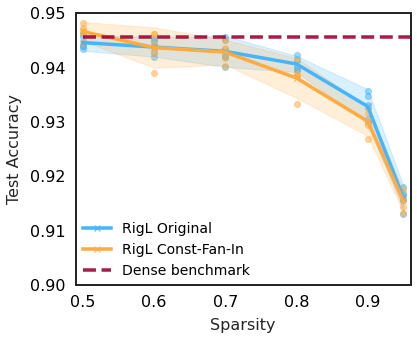

In [48]:
_MODEL = "wide_resnet22"
_PLOT_99_SPARSITY= False

plot_df = df.copy()
plot_df = plot_df.loc[plot_df["State"] == "finished"]
if not _PLOT_99_SPARSITY:
  plot_df = plot_df.loc[plot_df["rigl.dense_allocation"] != 0.01]
plot_df = plot_df.loc[plot_df["model"] == _MODEL]
plot_df["sparsity"] = 1-plot_df["rigl.dense_allocation"]
plot_dfs = []
fig, ax = plt.subplots(figsize=(6,5))
colors = ['#45b6fe','#ffab40','#9c0534'] # '#ffab40' '#ff671f'

table_df = {
    "sparsity":[],
    "method":[],
    "lower_bound":[],
    "upper_bound":[],
    "+/-":[]
}

for idx, fan_in in enumerate(plot_df["rigl.const_fan_in"].unique()):
    df_slice = plot_df.loc[plot_df["rigl.const_fan_in"] == fan_in]
    if fan_in:
        name = "RigL Const-Fan-In"
    else:
        name = "RigL Original"
    agg_results = get_confidence_bounds_df(df_slice)
    agg_results = agg_results.sort_values(by="sparsity")
    agg_results["method"] = [name]*len(agg_results)
    agg_results["+/-"] = 100*(agg_results["mean"]-agg_results["lower_bound"])
    ax.plot(
        agg_results["sparsity"], agg_results["mean"], marker='x', label=name, color=colors[idx], alpha=1.0
    )
    ax.fill_between(
        agg_results["sparsity"],
        agg_results["upper_bound"],
        agg_results["lower_bound"],
        color=colors[idx],
        alpha=0.20)
    ax.scatter(
        df_slice["sparsity"], df_slice["accuracy"], marker='o', color=colors[idx], alpha=0.5
    )
_BENCHMARK_VALUE = 0.9455
ax.plot([0.5, 1.0], [_BENCHMARK_VALUE, _BENCHMARK_VALUE], "--",  label="Dense benchmark", color=colors[2], alpha=0.9)
model_name_dict = dict(
    resnet18="ResNet18",
    wide_resnet22="WideResNet22"
)
#plt.title(f"{model_name_dict[_MODEL]} CIFAR-10 Validation Set Accuracy vs. Sparsity")
plt.xlabel('Sparsity')
plt.ylabel('Test Accuracy')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
if not _PLOT_99_SPARSITY:
  ax.set_ylim([0.90,0.95])
  ax.set_xlim([0.49,.96])
else:
  ax.set_ylim([0.9,1.0])
  ax.set_xlim([0.49,1.0])
plt.show()

fig.savefig("resnet_cifar_results.png", dpi=600, bbox_inches="tight")
fig.savefig("Experiment.svg",format="svg", bbox_inches="tight")

In [22]:
agg_results["upper_bound"]-agg_results["mean"]

0    0.001843
1    0.001992
2    0.001886
3    0.002475
4    0.001414
5    0.003704
dtype: float64

In [36]:
# _MODEL = "resnet18"
# # _MODEL = "wide_resnet22"
# plot_df = mean.reset_index()
# plot_df = plot_df.loc[plot_df["rigl.dense_allocation"] != 0.01]
# plot_df = plot_df.loc[plot_df["model"] == _MODEL]
# plot_df["sparsity"] = 1-plot_df["rigl.dense_allocation"]
# plot_dfs = []

# fig = go.Figure()

# for fan_in in plot_df["rigl.const_fan_in"].unique():
#     df = plot_df.loc[plot_df["rigl.const_fan_in"] == fan_in]
#     if fan_in:
#         name = "RigL with Constant Fan In"
#     else:
#         name = "RigL Original"
#     fig.add_trace(
#         go.Scatter(x=df["sparsity"], y=df.accuracy, name=name)
#     )

# _BENCHMARK_VALUE = 0.9506
# fig.add_trace(
#     go.Scatter(
#         y=[_BENCHMARK_VALUE, _BENCHMARK_VALUE ],
#         x=[0.5,1.0],
#         mode="lines",
#         line_dash="dash",
#         name = "Dense Benchmark",
#         line=dict(color="#3cb589")
#     )
# )

# # fig.add_hline(y=0.9506, line_width=3, line_dash="dash", opacity=0.2, name="Benchmark")
# model_name_dict = dict(
#     resnet18="ResNet18",
#     wide_resnet22="WideResNet22"
# )
# for template in ["plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white", "none"]:
#     print(template)
#     fig.update_layout(
#         template=template,
#         title=f"{model_name_dict[_MODEL]} Accuracy vs. Sparsity",
#         xaxis_title = "Sparsity",
#         yaxis_title = "CIFAR10 Test Accuracy",
#         title_x=0.5,
#         width=800,
#         height=800,
#         legend=dict(
#             yanchor="bottom",
#             y=0.01,
#             xanchor="left",
#             x=0.01
#         ),
#         font=dict(
#             size=24
#         ),
#         yaxis_tick0=0.85,
#         yaxis_dtick=0.01,
#         yaxis_range=(0.92,0.97)
#     )
#     fig.show()


In [4]:
import pathlib
from rigl_torch.models import ModelFactory
import torch
import rigl_torch.util as util

entity_project = "condensed-sparsity/condensed-rigl"
api = wandb.Api(timeout=30)
runs = api.runs(entity_project)
results = dict(
    run_id=[],
    config=[],
    artifact_path=[],
    model=[]
)
artifact_root = pathlib.Path("../artifacts/99-cifar-10-resnet/")
dataset="cifar10"
tag = "cifar-10-resnet-sweep"
# tag = "99%-cifar-10-resnet"

for run in runs:
    if tag in run.tags:
        if run.state != "finished":
            continue
        results["run_id"].append(run.id)
        results['config'].append(run.config)
        artifact = run.logged_artifacts()[0]
        art_file_glob = [x for x in (artifact_root / run.id).glob("*")]
        if len(art_file_glob) == 0:
            artifact.download(root=artifact_root / run.id)
        art_file_path = [x for x in (artifact_root / run.id).glob("*")][0]
        results["artifact_path"].append(art_file_path)
        model_config = run.config["model"]
        if "name" in model_config:
            model_name = model_config["name"]
        else:
            model_name = model_config
        model = ModelFactory.load_model(model=model_name, dataset=dataset)
        model.load_state_dict(torch.load(art_file_path))
        results['model'].append(model)

In [5]:
analysis = dict(
    const_fan_in=[],
    # ablated_neurons_per_layer=[],
    run_id=[],
    seed=[],
    sparsity=[],
    mean_ablation=[],
    model_name=[]
)

for run_id, config, m in list(zip(results["run_id"], results["config"], results["model"])):
    analysis['run_id'].append(run_id)
    analysis["const_fan_in"].append(config["rigl"]["const_fan_in"])
    analysis["sparsity"].append(1-config["rigl"]["dense_allocation"])
    analysis["seed"].append(config["training"]["seed"])
    model_config = config["model"]
    if "name" in model_config:
        model_name = model_config["name"]
    else:
        model_name = model_config
    analysis["model_name"].append(model_name)
    weight_matrices = util.get_W(m)
    ablated_neurons=[]
    for w in weight_matrices:
        fan_in_tensor = util.get_fan_in_tensor(w)
        ablated_neurons.append(((fan_in_tensor ==0).sum() / len(fan_in_tensor)).item())
    # analysis["ablated_neurons_per_layer"].append(torch.tensor(ablated_neurons))
    analysis["mean_ablation"].append(torch.tensor(ablated_neurons).mean().item()*100)

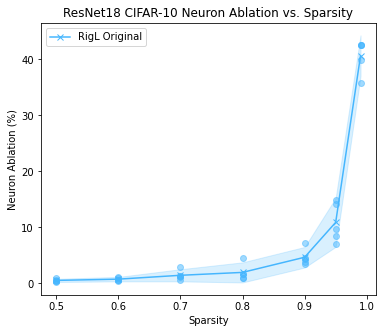

In [19]:
_PLOT_99_SPARSITY=True
_MODEL="resnet18"
plot_df = pd.DataFrame(analysis)
if not _PLOT_99_SPARSITY:
  plot_df = plot_df.loc[plot_df["rigl.dense_allocation"] != 0.01]
plot_df = plot_df.loc[plot_df["model_name"] == _MODEL]
plot_df = plot_df.sort_values(by="sparsity")
fig, ax = plt.subplots(figsize=(6,5))
colors = ['#45b6fe','#ffab40','#9c0534'] # '#ffab40' '#ff671f'


for idx, fan_in in enumerate(plot_df["const_fan_in"].unique()):
    df_slice = plot_df.loc[plot_df["const_fan_in"] == fan_in]
    if fan_in:
        name = "RigL Const-Fan-In"
        continue
    else:
        name = "RigL Original"
    agg_results = get_confidence_bounds_df(df_slice, target_col="mean_ablation")
    agg_results["method"] = [name]*len(agg_results)
    agg_results["+/-"] = 100*(agg_results["mean"]-agg_results["lower_bound"])
    ax.plot(
        agg_results["sparsity"], agg_results["mean"], marker='x', label=name, color=colors[idx], alpha=1.0
    )
    ax.fill_between(
        agg_results["sparsity"],
        agg_results["upper_bound"],
        agg_results["lower_bound"],
        color=colors[idx],
        alpha=0.20)
    ax.scatter(
        df_slice["sparsity"], df_slice["mean_ablation"], marker='o', color=colors[idx], alpha=0.5
    )
# ax.plot([0.5, 1.0], [_BENCHMARK_VALUE, _BENCHMARK_VALUE], "--",  label="Dense benchmark", color=colors[2], alpha=0.9)
model_name_dict = dict(
    resnet18="ResNet18",
    wide_resnet22="WideResNet22"
)
plt.title(f"{model_name_dict[_MODEL]} CIFAR-10 Neuron Ablation vs. Sparsity")
plt.xlabel('Sparsity')
plt.ylabel('Neuron Ablation (%)')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
# if not _PLOT_99_SPARSITY:
#   ax.set_ylim([0.93,0.96])
#   ax.set_xlim([0.49,.96])
# else:
#   ax.set_ylim([0.9,1.0])
#   ax.set_xlim([0.49,1.0])
plt.show()

# fig.savefig("resnet_cifar_results.png", dpi=600, bbox_inches="tight")
# fig.savefig("Experiment.svg",format="svg", bbox_inches="tight")

In [16]:
plot_df.groupby(["sparsity", "const_fan_in"]).mean()

seed  mean_ablation
sparsity const_fan_in                       
0.50     False         4841.2       0.546875
         True          4841.2       0.000000
0.60     False         4841.2       0.771949
         True          4841.2       0.001860
0.70     False         4841.2       1.460193
         True          4841.2       0.000000
0.80     False         4841.2       1.977307
         True          4841.2       0.001860
0.90     False         4841.2       4.681920
         True          4841.2       0.243676
0.95     False         4841.2      10.909598
         True          4841.2       2.217262
0.99     False         4841.2      40.658482
         True          5492.0       9.514509

In [15]:
plot_df.groupby(["sparsity", "const_fan_in"]).agg({"mean_ablation": "mean"})

mean_ablation
sparsity const_fan_in               
0.50     False              0.546875
         True               0.000000
0.60     False              0.771949
         True               0.001860
0.70     False              1.460193
         True               0.000000
0.80     False              1.977307
         True               0.001860
0.90     False              4.681920
         True               0.243676
0.95     False             10.909598
         True               2.217262
0.99     False             40.658482
         True               9.514509

In [21]:
10.91-6.55

4.36

In [20]:
agg_results

,sparsity,mean,lower_bound,upper_bound,method,+/-
0,0.50,0.546875,0.266679,0.827071,RigL Original,28.019593
1,0.60,0.771949,0.376012,1.167886,RigL Original,39.593706
2,0.70,1.460193,0.377583,2.542804,RigL Original,108.261041
3,0.80,1.977307,0.183824,3.770789,RigL Original,179.348269
4,0.90,4.681920,2.847250,6.516589,RigL Original,183.466930
5,0.95,10.909598,6.546841,15.272355,RigL Original,436.275735
6,0.99,40.658482,37.027440,44.289524,RigL Original,363.104187


In [12]:
plot_df.loc[
    (plot_df["sparsity"]==0.95) & 
    (plot_df["const_fan_in"] == False)
]

,const_fan_in,run_id,seed,sparsity,mean_ablation,model_name
98,False,y18akcrs,7303,0.95,14.983259,resnet18
100,False,ldz707p6,8746,0.95,9.756324,resnet18
99,False,x6qeyd4k,6037,0.95,7.096354,resnet18
97,False,y270isa3,2078,0.95,8.482143,resnet18
96,False,0ccvgow9,42,0.95,14.229910,resnet18


In [222]:
for m, config in list(zip(results["model"], results["config"])):
    const_fan_in = config["rigl"]["const_fan_in"]
    if const_fan_in is False:
        vanilla_model = m
    else:
        const_fan_in_model = m
    if vanilla_model is not None and const_fan_in_model is not None:
        break

In [4]:
import pathlib
from rigl_torch.models import ModelFactory
import torch
import rigl_torch.util as util
const_fan_in_fname="resnet18_cifar10_sweep_0.01_True.pt"
const_fan_in_model = ModelFactory.load_model("resnet18", "cifar10")
const_fan_in_model.load_state_dict(torch.load(f"../artifacts/{const_fan_in_fname}"))
vanilla_fname="resnet18_cifar10_sweep_0.01_False.pt"
vanilla_model = ModelFactory.load_model("resnet18", "cifar10")
vanilla_model.load_state_dict(torch.load(f"../artifacts/{vanilla_fname}"))


const_fan_W = util.get_W(const_fan_in_model)
vanilla_W = util.get_W(vanilla_model)
const_fan_ablated_neurons = []
vanilla_abalated_neurons = []
show_layers = True
for const_w, van_w in list(zip(const_fan_W, vanilla_W)):
    fan_in_tensor = util.get_fan_in_tensor(const_w)
    const_fan_ablated_neurons.append(((fan_in_tensor ==0).sum() / len(fan_in_tensor)).item())
    if show_layers:
        print("const fan in...")
        print(fan_in_tensor)
        print(util.calculate_fan_in_and_fan_out(const_w))
    fan_in_tensor = util.get_fan_in_tensor(van_w)
    vanilla_abalated_neurons.append(((fan_in_tensor ==0).sum() / len(fan_in_tensor)).item())
    if show_layers:
        print("vanilla...")
        print(fan_in_tensor)
        print(util.calculate_fan_in_and_fan_out(van_w))
        print("\n\n")
        if len(const_fan_ablated_neurons) > 5:
            break
# util.get_fan_in_tensor(const_fan_W)

# validate_constant_fan_in(get_fan_in_tensor())

const fan in...
tensor([14, 14, 14,  8,  7,  2, 14, 14,  8, 14, 10, 14,  3, 14, 14, 14, 12, 14,
         6, 14, 13, 14, 14, 12, 14, 14, 14, 14, 14,  5, 14, 14, 14, 10, 14, 12,
         3, 14,  5, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 10, 12, 14, 14,
        14, 14,  3, 14, 14, 14, 14, 14, 14, 14])
(27, 576)
vanilla...
tensor([ 0,  0,  0,  0, 27,  0, 27, 27,  0, 27, 27,  0,  0,  0, 27, 27, 21,  0,
         0, 27, 27,  0,  0,  0,  0,  0, 27,  0, 27, 27,  0, 13,  0, 27,  0, 27,
        27,  0,  0,  0, 27,  0,  0, 27,  0, 27, 27,  0, 27, 27,  0, 27, 27,  0,
        27,  0, 27,  0, 27,  0, 27,  0,  0,  0])
(27, 576)



const fan in...
tensor([26, 26, 26, 26, 26, 26,  1, 26, 26, 26, 26, 26,  0,  3, 26, 26, 26, 26,
        26, 26, 26,  0, 26, 26, 26, 26, 26, 26,  0,  6, 26, 26, 26, 26, 26, 26,
        26, 26, 26,  1, 26, 26,  0,  0,  1, 26, 26, 26, 26,  0, 26,  0,  0, 26,
        26, 26, 26, 26,  1, 26, 26, 26, 26, 26])
(576, 576)
vanilla...
tensor([ 58,   5,  14,  47,   1,   0,  96,  9

In [28]:
W = util.get_W(const_fan_in_model)
w = W[3][0]  # TODO: See if we can find out which of these are actually 0!
w

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[-0., 0., 0.],
         [-0., 0., 0.],
         [0., 0., 0.]],

        [[-0., 0., 0.],
         [0., 0., 0.],
         [0., -0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [-0., -0., -0.]],

        [[-0., -0., -0.],
         [0., -0., 0.],
         [-0., -0., 0.]],

        [[-0., -0., 0.],
         [-0., -0., -0.],
         [-0., -0., -0.]],

        [[-0., -0., 0.],
         [0., -0., 0.],
         [-0., 0., 0.]],

        [[0., 0., -0.],
         [-0., -0., -0.],
         [-0., 0., -0.]],

        [[-0., -0., 0.],
         [-0., -0., -0.],
         [-0., 0., -0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., -0., -0.],
         [0., 0., -0.],
         [-0., -0., 0.]],

        [[0., 0., 0.],
         [0

In [26]:
(w!=0).sum()

tensor(8)

In [17]:
w.to(torch.float64)

tensor([[[ 4.2098e-09,  7.5862e-09,  0.0000e+00],
         [ 2.6239e-09,  1.0605e-08,  0.0000e+00],
         [ 2.3343e-10,  0.0000e+00,  1.0472e-08]],

        [[-8.8809e-09,  0.0000e+00,  0.0000e+00],
         [ 3.4241e-10,  0.0000e+00, -0.0000e+00],
         [ 0.0000e+00,  0.0000e+00, -0.0000e+00]],

        [[-0.0000e+00, -0.0000e+00,  0.0000e+00],
         [-0.0000e+00, -0.0000e+00,  0.0000e+00],
         [-0.0000e+00, -0.0000e+00,  0.0000e+00]]], dtype=torch.float64,
       grad_fn=<ToCopyBackward0>)

In [22]:
w==0

tensor([[[False, False,  True],
         [False, False,  True],
         [False,  True, False]],

        [[False,  True,  True],
         [False,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]]])

In [113]:
import scipy.stats as st
fan_ins = {
    "const_fan": const_fan_ablated_neurons,
    "vanilla": vanilla_abalated_neurons
}
alpha=0.95
for k,v in fan_ins.items():
    mean = torch.tensor(v).mean()
    lower, upper = st.t.interval(
        alpha=alpha,
        df=len(v)-1,
        loc=mean,
        scale=st.sem(v)
    )
    print(f"{k}: mean: {mean}, lower: {lower}, upper: {upper}, +/- {mean-lower} / {upper-mean}")

const_fan: mean: 0.0962611585855484, lower: 0.06310042726143603, upper: 0.12942188990966078, +/- 0.0331607311964035 / 0.0331607311964035
vanilla: mean: 0.4249441921710968, lower: 0.3488102174331007, upper: 0.5010781669090929, +/- 0.07613396644592285 / 0.07613399624824524


In [94]:
torch.tensor(const_fan_ablated_neurons).mean()

tensor(0.0963)

In [93]:
torch.tensor(vanilla_abalated_neurons).mean()

tensor(0.4249)

In [65]:
torch.isclose(w[0], torch.zeros(w[0].shape)).sum()

tensor(15)